In [ ]:
# animate ASCII grids


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib
import math
print("Matplotlib version:")
print(matplotlib.__version__)
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#Input Root Directory path
CEMInputRoot = "..//..//data//output//CEM//PP_Nutrient//"
#Output Directory Root path
rootOutputDir = "..//..//data//output//CEM//"

prefix='Surface_Nutrient'
separator='_'
startyear='1980'
startmonth='1'
endyear='2014'
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Matplotlib version:
3.1.2


In [5]:
# test concatenation
i=1
CEMInputRoot + prefix + separator + str(int(startyear)+i) + separator + startmonth + '.asc'

'..//..//data//output//CEM//PP_Nutrient//Surface_Nutrient_1981_1.asc'

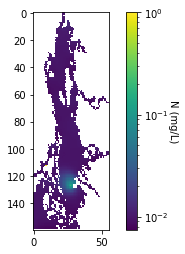

In [6]:
# test visual

temp_asc = open(CEMInputRoot + prefix + separator + startyear + separator + startmonth + '.asc', 'r')
temp_asc
i = 0

headerlines = []
asc_list = []
for x in temp_asc:
    if i<6:
        headerlines.append(x)
    else:
        x = x.split()
        x = [float(j) for j in x]
        #x = [1 if j >= 0 else 0 for j in x]
        asc_list.append(x)    
    i += 1
#print(headerlines)
#print(template_map_list)

npArray_asc = np.array(asc_list)


# https://matplotlib.org/tutorials/introductory/images.html
# https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels
#colorbar
# cbar = plt.colorbar(heatmap)
# cbar.ax.set_yticklabels(['0','1','2','>3'])
#cbar = fig.colorbar(im)
#cbar.set_label('Test', y=0.25)
# cbar.set_label('# of contacts', rotation=270)
# fig = plt.imshow(npArray_asc,norm=LogNorm())
# cbar = fig.colorbar(i)
# cbar.set_label('# of contacts', rotation=270)
# fig.show()

# https://stackoverflow.com/questions/33602042/how-to-move-a-colorbar-label-downward
# https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
fig, ax = plt.subplots()
im = ax.imshow(npArray_asc,norm=LogNorm())
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
cbar = fig.colorbar(im, pad =0.05)
cbar.set_label('N (mg/L)', rotation=270, y=0.5,labelpad=10)
               #orientation="horizontal")
plt.show()

In [104]:
#(16/12) - math.trunc(16 /12)
i = 12
year = math.trunc((i+1)/12) + int(startyear)
print(year)

1981


In [107]:
# animation

# https://gist.github.com/vaclavcadek/66c9c61a1fac30150514a665c4bcb5dc
fig, ax = plt.subplots(figsize=(5, 8))

def update(i):
    #print(i)
    
    month_dec = ((i+1)/12) - math.trunc((i+1)/12)
    month = math.trunc(month_dec * 12)+1
    year = math.trunc((i+1)/12) + int(startyear)

    j=0
    temp_asc = open(CEMInputRoot + prefix + separator + str(year) + separator + str(month) + '.asc', 'r')
  
    headerlines = []
    asc_list = []
    for x in temp_asc:
        if j<6:
            headerlines.append(x)
        else:
            x = x.split()
            x = [float(k) for k in x]
            x = [np.nan if j == -9999 else j for j in x]
            asc_list.append(x)    
        j += 1
    npArray_asc = np.array(asc_list)
      
    im = ax.imshow(npArray_asc,norm=LogNorm())
    
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    ax.set_title("Year: {}".format(year) + " Month: {}".format(month), fontsize=20)
    ax.set_axis_off()

cbar = fig.colorbar(im, pad =0.05)
cbar.set_label('N (mg/L)', rotation=270, y=0.5,labelpad=10)
anim = FuncAnimation(fig, update, frames=np.arange(0, 200), interval=200)
anim.save('animation_test.gif', dpi=80, writer='imagemagick')
plt.close()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


In [28]:
# alternative
# https://stackoverflow.com/questions/60033397/moviewriter-ffmpeg-unavailable-trying-to-use-class-matplotlib-animation-pillo
# from matplotlib import pyplot as plt
# from celluloid import Camera
# import numpy as np

# # create figure object
# fig = plt.figure()
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(0, 1)
# ax.set_xlim(0, 10)

# camera = Camera(fig)
# for i in range(10):
#     ax.scatter(i, np.random.random())
#     plt.pause(0.1)
#     camera.snap()

# animation = camera.animate()
# animation.save('animation.gif', writer='PillowWriter', fps=2)